# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city_name)
        countries.append(country)
        
# Print the city count to confirm sufficient count
len(cities)

1500

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# DF to store all cities and city number (uses citipy)
citydf = pd.DataFrame({'City': cities, 'Country': countries})

# Sets parameters for calling city name


# Target Url for API calls
target_url = "http://api.openweathermap.org/data/2.5/weather"

# Create add'l fields for later api calls
citydf['Date'] = ''
citydf['Latitude'] = ''
citydf['Longitude'] = ''
citydf['Max Temp (F)'] = ''
citydf['Humidity (%)'] = ''
citydf['Cloudiness (%)'] = ''
citydf['Wind Speed'] = ''

city_count = 0

# Loop through the API
for index,row in citydf.iterrows():

    city_name = row['City']
    country_id = row['Country']
    
    # Set query parameters
    params = {'q': city_name,'units': 'imperial','appid': weather_api_key,}
    response = requests.get(target_url, params = params).json()
    
    try:
        citydf.loc[index, 'Date'] = response['dt']
        citydf.loc[index, 'Latitude'] = response['coord']['lat']
        citydf.loc[index, 'Longitude'] = response['coord']['lon']
        citydf.loc[index, 'Max Temp (F)'] = response['main']['temp_max']
        citydf.loc[index, 'Humidity (%)'] = response['main']['humidity']
        citydf.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        citydf.loc[index, 'Wind Speed'] = response['wind']['speed']
        
        # Update city number
        city_count += 1
        
        # Print log of each city being processed (only if all data is available)
        print(f'Processing entry. City #: {city_count}, City Name: {city_name}')
        
    except (KeyError, IndexError):

        print("Data missing, excluding result...")


Processing entry. City #: 1, City Name: victoria
Processing entry. City #: 2, City Name: vanavara
Processing entry. City #: 3, City Name: borzya
Processing entry. City #: 4, City Name: kavaratti
Processing entry. City #: 5, City Name: rikitea
Processing entry. City #: 6, City Name: carnarvon
Processing entry. City #: 7, City Name: nemuro
Processing entry. City #: 8, City Name: cidreira
Processing entry. City #: 9, City Name: port elizabeth
Data missing, excluding result...
Processing entry. City #: 10, City Name: rikitea
Processing entry. City #: 11, City Name: cape town
Processing entry. City #: 12, City Name: lamphun
Data missing, excluding result...
Processing entry. City #: 13, City Name: manitouwadge
Processing entry. City #: 14, City Name: punta arenas
Processing entry. City #: 15, City Name: nikel
Processing entry. City #: 16, City Name: rikitea
Processing entry. City #: 17, City Name: rikitea
Processing entry. City #: 18, City Name: punta arenas
Processing entry. City #: 19, Ci

Processing entry. City #: 157, City Name: namibe
Processing entry. City #: 158, City Name: nome
Processing entry. City #: 159, City Name: asfi
Data missing, excluding result...
Processing entry. City #: 160, City Name: baherden
Processing entry. City #: 161, City Name: ndioum
Processing entry. City #: 162, City Name: saskylakh
Processing entry. City #: 163, City Name: qaanaaq
Processing entry. City #: 164, City Name: punta arenas
Processing entry. City #: 165, City Name: cherskiy
Processing entry. City #: 166, City Name: khonsa
Processing entry. City #: 167, City Name: vila velha
Processing entry. City #: 168, City Name: filingue
Processing entry. City #: 169, City Name: ushuaia
Data missing, excluding result...
Processing entry. City #: 170, City Name: porto murtinho
Processing entry. City #: 171, City Name: hobart
Processing entry. City #: 172, City Name: albany
Processing entry. City #: 173, City Name: port alfred
Processing entry. City #: 174, City Name: punta arenas
Processing ent

Processing entry. City #: 312, City Name: mossendjo
Processing entry. City #: 313, City Name: khani
Processing entry. City #: 314, City Name: katsuura
Processing entry. City #: 315, City Name: hermanus
Processing entry. City #: 316, City Name: puerto ayora
Processing entry. City #: 317, City Name: albany
Processing entry. City #: 318, City Name: hasaki
Processing entry. City #: 319, City Name: lata
Processing entry. City #: 320, City Name: kawalu
Processing entry. City #: 321, City Name: praia
Processing entry. City #: 322, City Name: rikitea
Processing entry. City #: 323, City Name: georgetown
Processing entry. City #: 324, City Name: alihe
Processing entry. City #: 325, City Name: salalah
Processing entry. City #: 326, City Name: khatanga
Processing entry. City #: 327, City Name: upernavik
Processing entry. City #: 328, City Name: cabo san lucas
Processing entry. City #: 329, City Name: gazanjyk
Processing entry. City #: 330, City Name: butaritari
Processing entry. City #: 331, City 

Processing entry. City #: 465, City Name: kodiak
Processing entry. City #: 466, City Name: bluff
Processing entry. City #: 467, City Name: castro
Processing entry. City #: 468, City Name: ust-kan
Processing entry. City #: 469, City Name: barrow
Processing entry. City #: 470, City Name: georgetown
Processing entry. City #: 471, City Name: broome
Processing entry. City #: 472, City Name: hilo
Processing entry. City #: 473, City Name: airai
Processing entry. City #: 474, City Name: lebu
Data missing, excluding result...
Data missing, excluding result...
Processing entry. City #: 475, City Name: hithadhoo
Processing entry. City #: 476, City Name: bluff
Processing entry. City #: 477, City Name: mantua
Processing entry. City #: 478, City Name: elbistan
Processing entry. City #: 479, City Name: beira
Data missing, excluding result...
Data missing, excluding result...
Data missing, excluding result...
Data missing, excluding result...
Data missing, excluding result...
Processing entry. City #:

Processing entry. City #: 614, City Name: tiksi
Processing entry. City #: 615, City Name: pevek
Processing entry. City #: 616, City Name: tabou
Processing entry. City #: 617, City Name: axim
Processing entry. City #: 618, City Name: rikitea
Processing entry. City #: 619, City Name: rikitea
Processing entry. City #: 620, City Name: arraial do cabo
Processing entry. City #: 621, City Name: yellowknife
Processing entry. City #: 622, City Name: ostrovnoy
Data missing, excluding result...
Processing entry. City #: 623, City Name: tiksi
Data missing, excluding result...
Processing entry. City #: 624, City Name: khatanga
Processing entry. City #: 625, City Name: puerto ayora
Processing entry. City #: 626, City Name: kapaa
Processing entry. City #: 627, City Name: mataura
Processing entry. City #: 628, City Name: chuy
Processing entry. City #: 629, City Name: rikitea
Processing entry. City #: 630, City Name: port hawkesbury
Processing entry. City #: 631, City Name: cidreira
Processing entry. C

Processing entry. City #: 767, City Name: ulladulla
Processing entry. City #: 768, City Name: saskylakh
Processing entry. City #: 769, City Name: saint-philippe
Processing entry. City #: 770, City Name: daru
Processing entry. City #: 771, City Name: great falls
Processing entry. City #: 772, City Name: umm kaddadah
Processing entry. City #: 773, City Name: hermanus
Processing entry. City #: 774, City Name: berlevag
Processing entry. City #: 775, City Name: saskylakh
Processing entry. City #: 776, City Name: soyo
Processing entry. City #: 777, City Name: cape town
Processing entry. City #: 778, City Name: pisco
Processing entry. City #: 779, City Name: mar del plata
Processing entry. City #: 780, City Name: mataura
Processing entry. City #: 781, City Name: albany
Processing entry. City #: 782, City Name: basco
Processing entry. City #: 783, City Name: ajjampur
Processing entry. City #: 784, City Name: ushuaia
Processing entry. City #: 785, City Name: yellowknife
Processing entry. City #

Processing entry. City #: 918, City Name: thompson
Data missing, excluding result...
Processing entry. City #: 919, City Name: westport
Processing entry. City #: 920, City Name: punta arenas
Processing entry. City #: 921, City Name: rundu
Data missing, excluding result...
Processing entry. City #: 922, City Name: cidreira
Data missing, excluding result...
Processing entry. City #: 923, City Name: san jose
Processing entry. City #: 924, City Name: saint-philippe
Processing entry. City #: 925, City Name: tura
Processing entry. City #: 926, City Name: rockhampton
Processing entry. City #: 927, City Name: upernavik
Processing entry. City #: 928, City Name: pouebo
Processing entry. City #: 929, City Name: bethel
Processing entry. City #: 930, City Name: padang
Processing entry. City #: 931, City Name: puerto ayora
Processing entry. City #: 932, City Name: qaanaaq
Processing entry. City #: 933, City Name: ushuaia
Processing entry. City #: 934, City Name: albany
Processing entry. City #: 935,

Processing entry. City #: 1067, City Name: tiksi
Processing entry. City #: 1068, City Name: avarua
Processing entry. City #: 1069, City Name: port macquarie
Data missing, excluding result...
Processing entry. City #: 1070, City Name: punta arenas
Processing entry. City #: 1071, City Name: ushuaia
Processing entry. City #: 1072, City Name: tingi
Processing entry. City #: 1073, City Name: albany
Processing entry. City #: 1074, City Name: busselton
Processing entry. City #: 1075, City Name: hobart
Processing entry. City #: 1076, City Name: yellowknife
Processing entry. City #: 1077, City Name: khatanga
Processing entry. City #: 1078, City Name: marawi
Data missing, excluding result...
Processing entry. City #: 1079, City Name: westport
Processing entry. City #: 1080, City Name: naze
Processing entry. City #: 1081, City Name: sao filipe
Processing entry. City #: 1082, City Name: busselton
Processing entry. City #: 1083, City Name: aksha
Processing entry. City #: 1084, City Name: punta aren

Data missing, excluding result...
Processing entry. City #: 1216, City Name: grevesmuhlen
Processing entry. City #: 1217, City Name: yellowknife
Processing entry. City #: 1218, City Name: kodiak
Processing entry. City #: 1219, City Name: lebu
Processing entry. City #: 1220, City Name: asau
Processing entry. City #: 1221, City Name: cape town
Processing entry. City #: 1222, City Name: bambous virieux
Processing entry. City #: 1223, City Name: port alfred
Processing entry. City #: 1224, City Name: yellowknife
Processing entry. City #: 1225, City Name: souillac
Processing entry. City #: 1226, City Name: salamanca
Data missing, excluding result...
Data missing, excluding result...
Processing entry. City #: 1227, City Name: kumluca
Processing entry. City #: 1228, City Name: sabha
Processing entry. City #: 1229, City Name: vaini
Processing entry. City #: 1230, City Name: cimarron hills
Processing entry. City #: 1231, City Name: chokurdakh
Processing entry. City #: 1232, City Name: benguela
P

Processing entry. City #: 1366, City Name: ushuaia
Processing entry. City #: 1367, City Name: serebryanyy bor
Processing entry. City #: 1368, City Name: jember
Processing entry. City #: 1369, City Name: thompson
Processing entry. City #: 1370, City Name: albany
Data missing, excluding result...
Processing entry. City #: 1371, City Name: vila
Processing entry. City #: 1372, City Name: port hueneme
Processing entry. City #: 1373, City Name: verkhnevilyuysk
Processing entry. City #: 1374, City Name: saint george
Processing entry. City #: 1375, City Name: boddam
Processing entry. City #: 1376, City Name: cape town
Processing entry. City #: 1377, City Name: hilo
Processing entry. City #: 1378, City Name: mar del plata
Processing entry. City #: 1379, City Name: ancud


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# Drops all n/a fields, prints total entries, and prints the df with all data from api
citydf.replace('',np.nan,inplace=True)
citydf = citydf.dropna()
total_cities = citydf.count()
print(total_cities)
citydf.head(50)

City              1379
Country           1379
Date              1379
Latitude          1379
Longitude         1379
Max Temp (F)      1379
Humidity (%)      1379
Cloudiness (%)    1379
Wind Speed        1379
dtype: int64


,City,Country,Date,Latitude,Longitude,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed
0,victoria,sc,1.595558e+09,22.29,114.16,91.99,66.0,71.0,8.99
1,vanavara,ru,1.595558e+09,60.34,102.28,58.15,73.0,100.0,9.19
2,borzya,ru,1.595558e+09,50.38,116.52,83.17,49.0,83.0,6.67
3,kavaratti,in,1.595558e+09,10.57,72.64,82.24,80.0,100.0,12.39
4,rikitea,pf,1.595558e+09,-23.12,-134.97,67.24,59.0,39.0,14.07
5,carnarvon,au,1.595558e+09,-24.87,113.63,69.80,46.0,0.0,12.75
6,nemuro,jp,1.595558e+09,43.32,145.57,64.40,93.0,75.0,5.82
7,cidreira,br,1.595558e+09,-30.18,-50.21,64.94,82.0,92.0,8.16
8,port elizabeth,za,1.595558e+09,-33.92,25.57,44.60,87.0,0.0,3.36
10,rikitea,pf,1.595558e+09,-23.12,-134.97,67.24,59.0,39.0,14.07


In [13]:
# Stores all data found to a csv
citydf.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
citydf['Humidity (%)'].max()

100.0

In [15]:
#  Get the indices of cities that have humidity over 100%.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [17]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs. Max Temperature (04/01/20)')

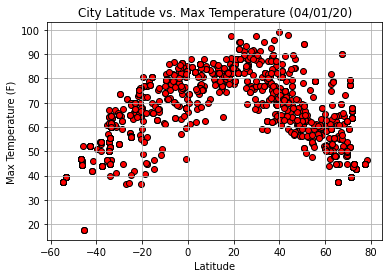

In [18]:
# Fig #1: Temperature vs. Latitude

plt.scatter(citydf['Latitude'],citydf['Max Temp (F)'], c = 'r', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature (04/01/20)')

#### Latitude vs Temperature Analysis
* By plotting the max temps across all latitudes, we can now get a visual representation the possible max temp trends against latitudes. 
* From a first glance there appears to be a strong correlation.

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs. Humidity (04/01/20)')

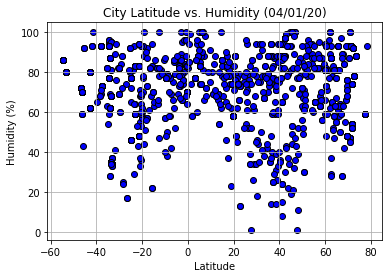

In [19]:
# Fig #1: Temperature vs. Latitude

plt.scatter(citydf['Latitude'],citydf['Humidity (%)'], c = 'b', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity (04/01/20)')

#### Latitude vs Humidity Analysis
* By plotting the humidity across all latitudes, we can now get a visual representation the possible humidity trends against latitudes. 
* From a first glance there appears to be a slight decline in humidity in the northern hemisphere. 

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs. Cloudiness (04/01/20)')

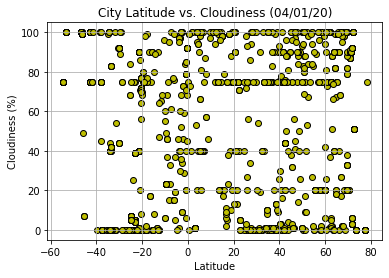

In [20]:
# Fig #1: Temperature vs. Latitude

plt.scatter(citydf['Latitude'],citydf['Cloudiness (%)'], c = 'y', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness (04/01/20)')

#### Latitude vs Cloudiness Analysis
* By plotting the cloudiness across all latitudes, we can now get a visual representation the possible cloudiness trends against latitudes. 
* From a first glance there appears to be little to no coorelation. 

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs. Wind Speed (04/01/20)')

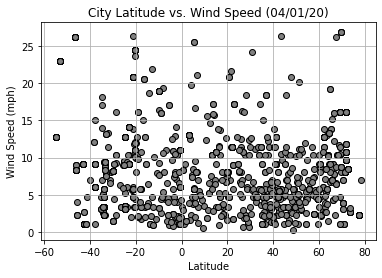

In [21]:
# Fig #1: Temperature vs. Latitude

plt.scatter(citydf['Latitude'],citydf['Wind Speed'], c = 'grey', edgecolor = 'k')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed (04/01/20)')

#### Latitdue vs Wind Speed Analysis
* By plotting the wind speed across all latitudes, we can now get a visual representation the possible wind speed trends against latitudes. 
* From a first glance there appears to be little to no coorelation. 

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.55


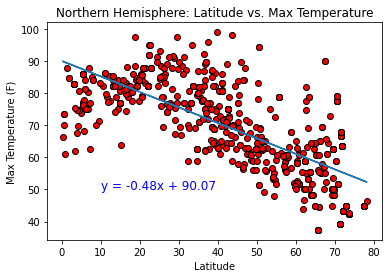

In [22]:
north_citydf = citydf.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Max Temp (F)'], c = 'r', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere: Latitude vs. Max Temperature')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Max Temp (F)'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(10,50),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.72


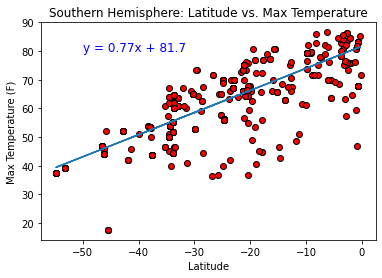

In [23]:
south_citydf = citydf.loc[citydf['Latitude']<0]
plt.scatter(south_citydf['Latitude'],south_citydf['Max Temp (F)'], c = 'r', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere: Latitude vs. Max Temperature')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_citydf['Latitude'],south_citydf['Max Temp (F)'])
regress_values = south_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(-50,80),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0


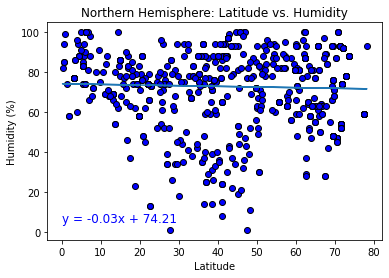

In [32]:
north_citydf = citydf.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Humidity (%)'], c = 'b', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hemisphere: Latitude vs. Humidity')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Humidity (%)'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(0,5),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.72


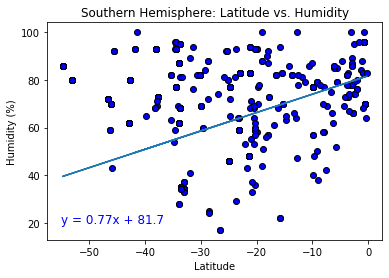

In [25]:
south_citydf = citydf.loc[citydf['Latitude']<0]
plt.scatter(south_citydf['Latitude'],south_citydf['Humidity (%)'], c = 'b', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hemisphere: Latitude vs. Humidity')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_citydf['Latitude'],south_citydf['Max Temp (F)'])
regress_values = south_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(-55,20),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0


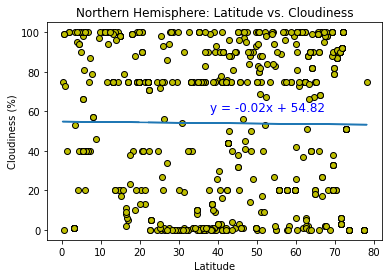

In [31]:
north_citydf = citydf.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Cloudiness (%)'], c = 'y', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere: Latitude vs. Cloudiness')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Cloudiness (%)'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(38,60),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05


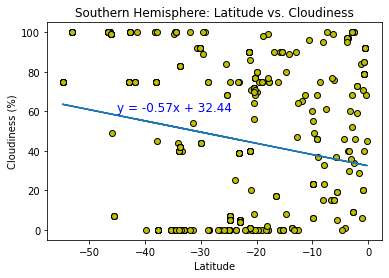

In [30]:
south_citydf = citydf.loc[citydf['Latitude']<0]
plt.scatter(south_citydf['Latitude'],south_citydf['Cloudiness (%)'], c = 'y', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere: Latitude vs. Cloudiness')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_citydf['Latitude'],south_citydf['Cloudiness (%)'])
regress_values = south_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(-45,60),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0


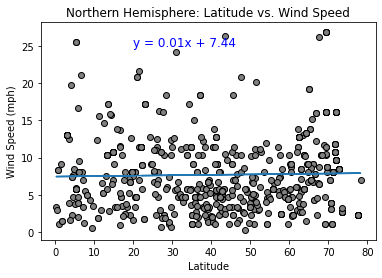

In [33]:
north_citydf = citydf.loc[citydf['Latitude']>0]
plt.scatter(north_citydf['Latitude'],north_citydf['Wind Speed'], c = 'grey', edgecolor = 'k')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere: Latitude vs. Wind Speed')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_citydf['Latitude'],north_citydf['Wind Speed'])
regress_values = north_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(20,25),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05


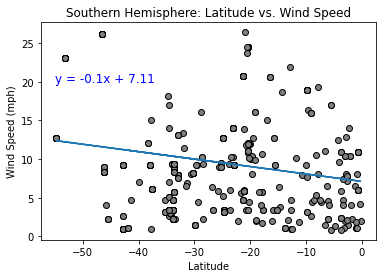

In [34]:
south_citydf = citydf.loc[citydf['Latitude']<0]
plt.scatter(south_citydf['Latitude'],south_citydf['Wind Speed'], c = 'grey', edgecolor = 'k',)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere: Latitude vs. Wind Speed')

# Regression Analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_citydf['Latitude'],south_citydf['Wind Speed'])
regress_values = south_citydf['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_citydf['Latitude'],regress_values)
plt.annotate(line_eq,(-55,20),fontsize=12,color="b")
print(f"The r-squared is: {round(rvalue**2,2)}")

## What's the weather as it gets hotter?
* The northern hemisphere has a moderate negative correlation: as latitude increases, temp decreases but we do not see as strong of a trend compared to the southern hemisphere. (r_sq = .55, slope = -.48)
* The southern hemisphere has a strong positive correlation: as latitude increases, temp increases. (r_sq = .72, slope = .77)
* The only other notable trend can be found in the lat vs hum for the southern hemisphere. This also experiences a positive correlation: as latitude increases, humidity increases. (r_sq = .72, slope = .77) 
* An additional observation I made is that the lat vs temp has similar r_sq & slope values as the lat vs hum analysis. However, in the lat vs hum visual you can see that the variability is much higher than the lat vs temp. This shows the limitation of analyzing data without both the visual and regression analysis. In order to better tell the story, we should take extra steps to find out the differences in data sets. Using variability as another metric would help communicate this. 
